<a href="https://colab.research.google.com/github/ravindrayanamaddi/bharat-intern/blob/main/prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_curve

In [ ]:
train = pd.read_csv("/content/train.csv", index_col = "PassengerId")
test = pd.read_csv("/content/test.csv", index_col = "PassengerId")

In [ ]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
train.shape

(849, 11)

In [ ]:
test.shape

(399, 10)

In [ ]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
test.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
train.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         171
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       655
Embarked      2
dtype: int64

In [ ]:
test.isna().sum()

Pclass        0
Name          0
Sex           0
Age          81
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       314
Embarked      0
dtype: int64

In [ ]:
train.nunique()

Survived      2
Pclass        3
Name        849
Sex           2
Age          87
SibSp         7
Parch         7
Ticket      654
Fare        241
Cabin       141
Embarked      3
dtype: int64

In [ ]:
test.nunique()

Pclass        3
Name        399
Sex           2
Age          77
SibSp         7
Parch         8
Ticket      348
Fare        163
Cabin        72
Embarked      3
dtype: int64

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 849 entries, 1 to 849
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  849 non-null    int64  
 1   Pclass    849 non-null    int64  
 2   Name      849 non-null    object 
 3   Sex       849 non-null    object 
 4   Age       678 non-null    float64
 5   SibSp     849 non-null    int64  
 6   Parch     849 non-null    int64  
 7   Ticket    849 non-null    object 
 8   Fare      849 non-null    float64
 9   Cabin     194 non-null    object 
 10  Embarked  847 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 79.6+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 399 entries, 892 to 1290
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    399 non-null    int64  
 1   Name      399 non-null    object 
 2   Sex       399 non-null    object 
 3   Age       318 non-null    float64
 4   SibSp     399 non-null    int64  
 5   Parch     399 non-null    int64  
 6   Ticket    399 non-null    object 
 7   Fare      398 non-null    float64
 8   Cabin     85 non-null     object 
 9   Embarked  399 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 34.3+ KB


In [ ]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,849.000000,849.000000,678.000000,849.000000,849.000000,849.000000
mean,0.382803,2.310954,29.668392,0.520612,0.374558,32.527753
std,0.486357,0.835467,14.517179,1.086956,0.794208,50.463353
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.458300
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.275000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
train.describe(include = ["O"])

,Name,Sex,Ticket,Cabin,Embarked
count,849,849,849,194,847
unique,849,2,654,141,3
top,"Braund, Mr. Owen Harris",male,1601,G6,S
freq,1,555,7,4,613


In [ ]:
train["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [ ]:
train["Cabin"] = train["Cabin"].apply(lambda x : x[0] if pd.notna(x) else "na")
train["Cabin"].unique()

array(['na', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [ ]:
test["Cabin"] = test["Cabin"].apply(lambda x : x[0] if pd.notna(x) else "na")
test["Cabin"].unique()

array(['na', 'B', 'E', 'A', 'C', 'D', 'F', 'G'], dtype=object)

In [ ]:
train.reset_index(inplace = True)
test.reset_index(inplace = True)

train.drop(["PassengerId", "Name", "Ticket"], axis = 1, inplace = True)
test_passenger_ids = test["PassengerId"]  # Saved seperately for submission file
test.drop(["PassengerId", "Name", "Ticket"], axis = 1, inplace = True)

train["Age"].fillna(train["Age"].mean(skipna = True), inplace = True)
test["Age"].fillna(test["Age"].mean(skipna = True), inplace = True)

train["Embarked"].fillna("S", inplace = True)
test["Embarked"].fillna("S", inplace = True)

test["Fare"].fillna(test["Fare"].mean(skipna = True), inplace = True)

In [ ]:
train.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [ ]:
test.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [ ]:
sex = {'male': 0, 'female': 1}
train["Sex"] = [sex[i] for i in train["Sex"]]
test["Sex"] = [sex[i] for i in test["Sex"]]

embarked = {'S': 0, 'C': 1, 'Q':2}
train["Embarked"] = [embarked[i] for i in train["Embarked"]]
test["Embarked"] = [embarked[i] for i in test["Embarked"]]
# train["Embarked"] = train["Embarked"].map(embarked).astype(int)
# test["Embarked"] = test["Embarked"].map(embarked).astype(int)

cabin_plot = train[["Cabin", "Survived"]]
train["Cabin"] = LabelEncoder().fit_transform(train["Cabin"])
test["Cabin"] = LabelEncoder().fit_transform(test["Cabin"])

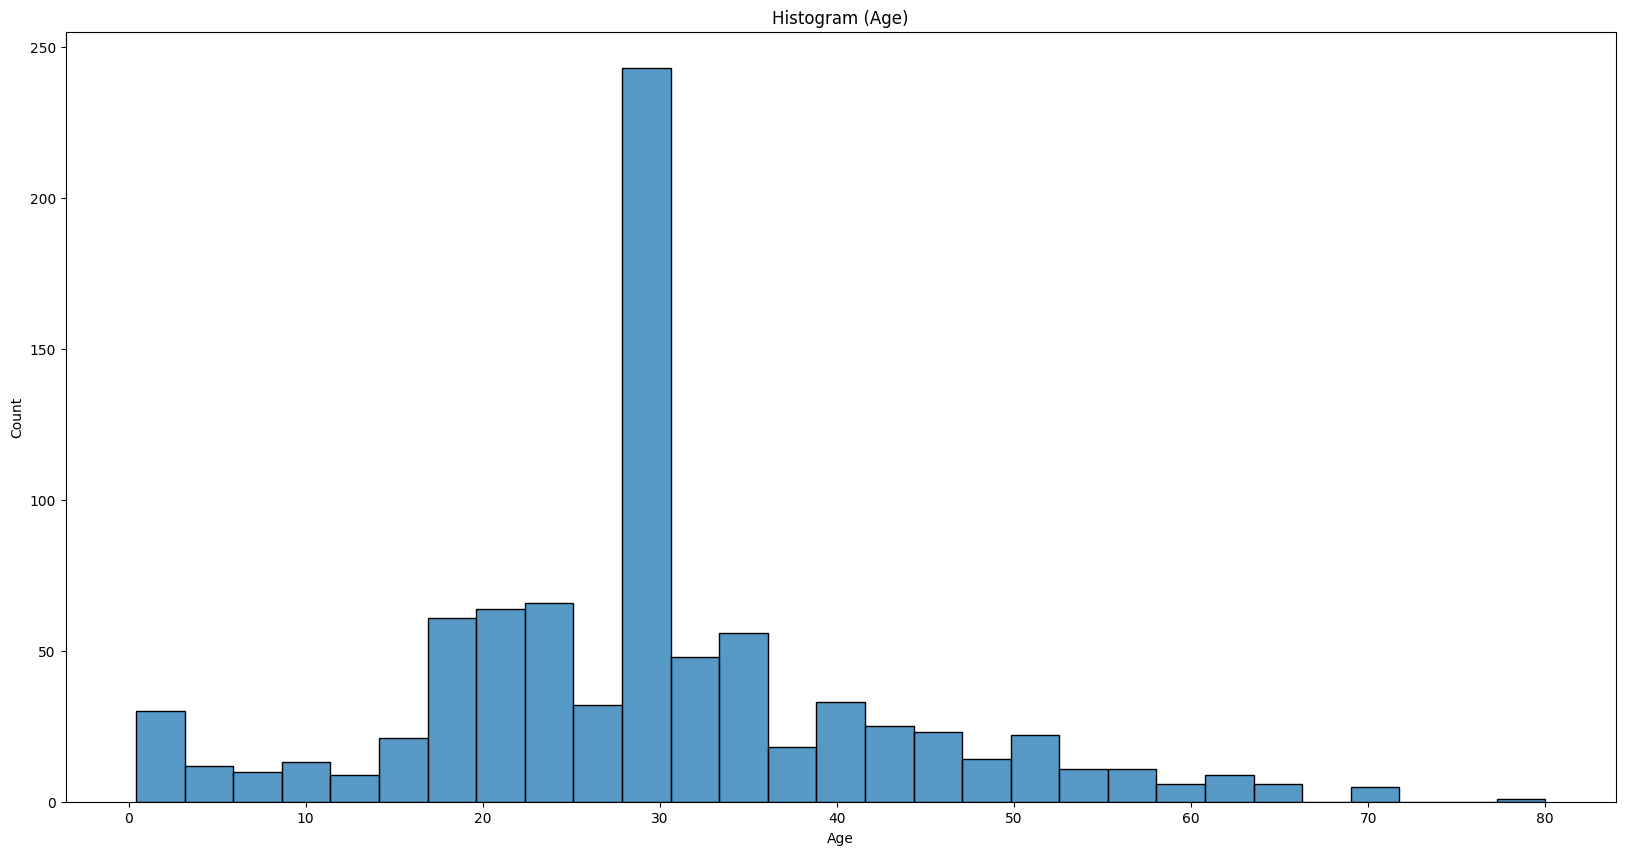

In [ ]:
plt.figure(figsize = (20,10))
sns.histplot(x = "Age", data = train)
plt.title("Histogram (Age)")
plt.show()

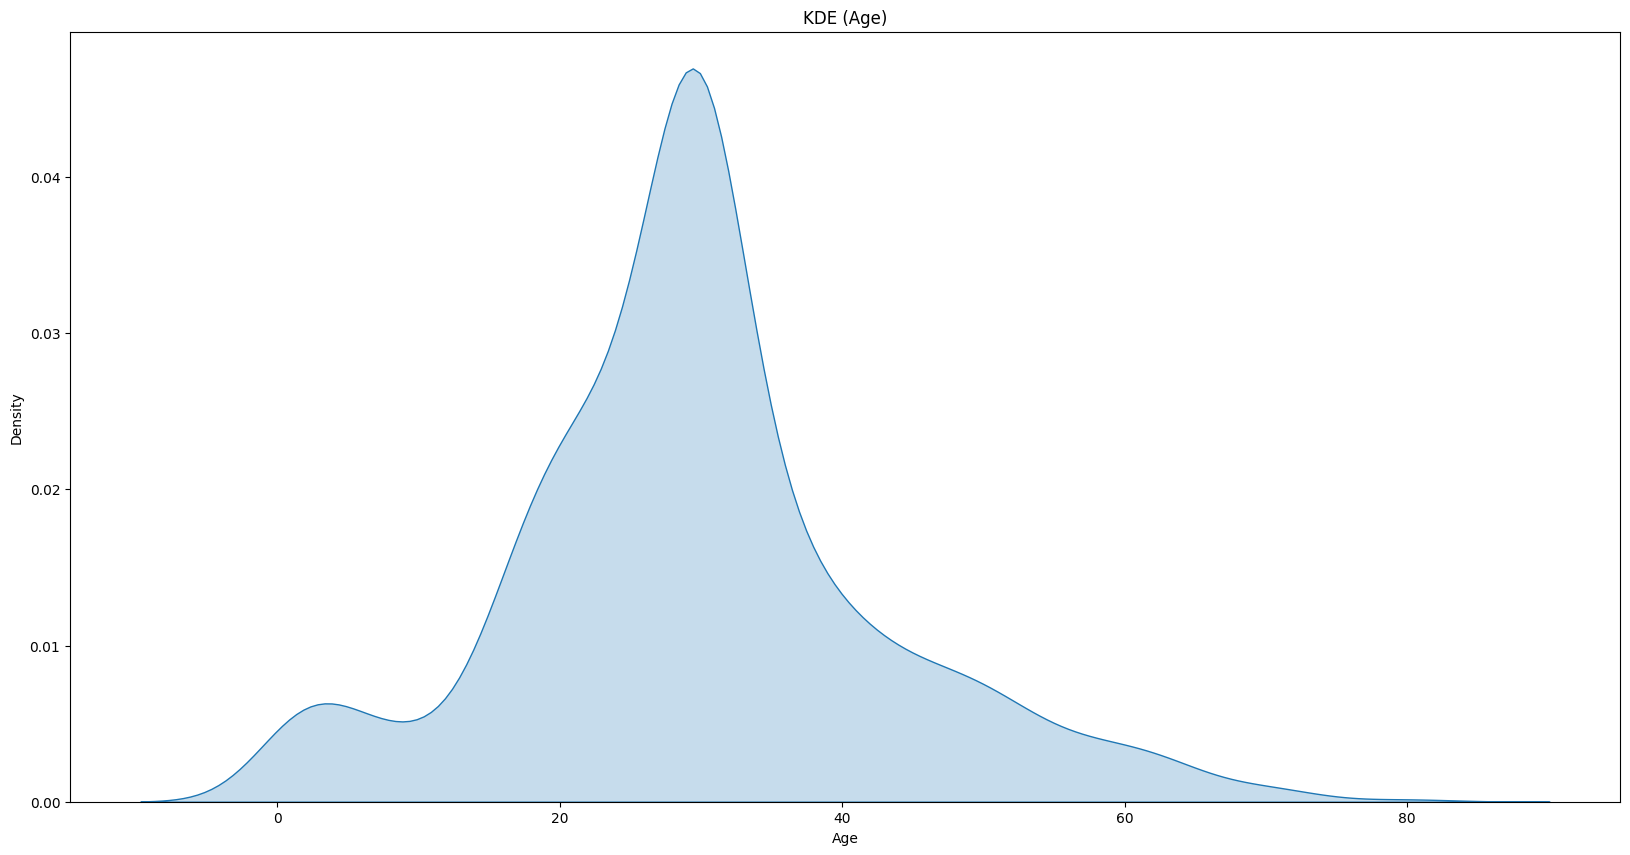

In [ ]:
plt.figure(figsize = (20,10))
sns.kdeplot(x = "Age", data = train, fill = True)
plt.title("KDE (Age)")
plt.show()

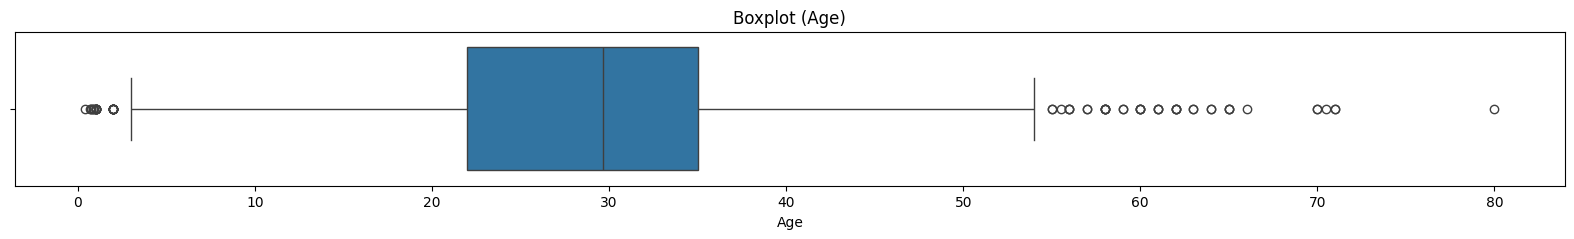

In [ ]:
plt.figure(figsize = (20,2))
sns.boxplot(x = "Age", data = train)
plt.title("Boxplot (Age)")
plt.show()

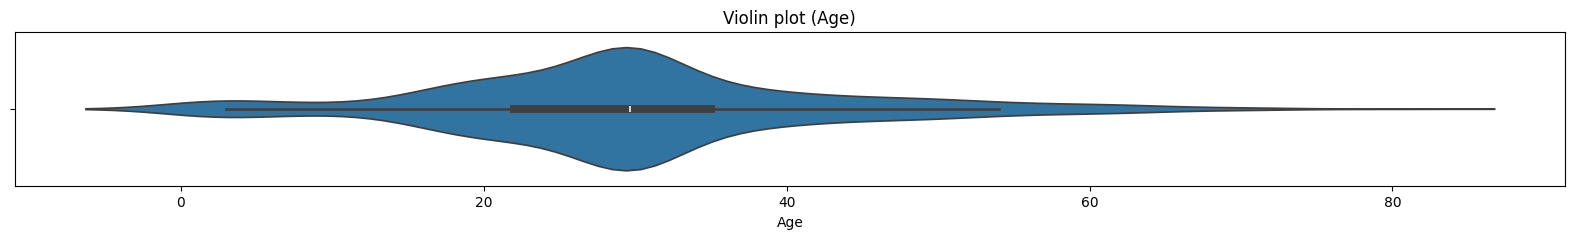

In [ ]:
plt.figure(figsize = (20,2))
sns.violinplot(x = "Age", data = train)
plt.title("Violin plot (Age)")
plt.show()

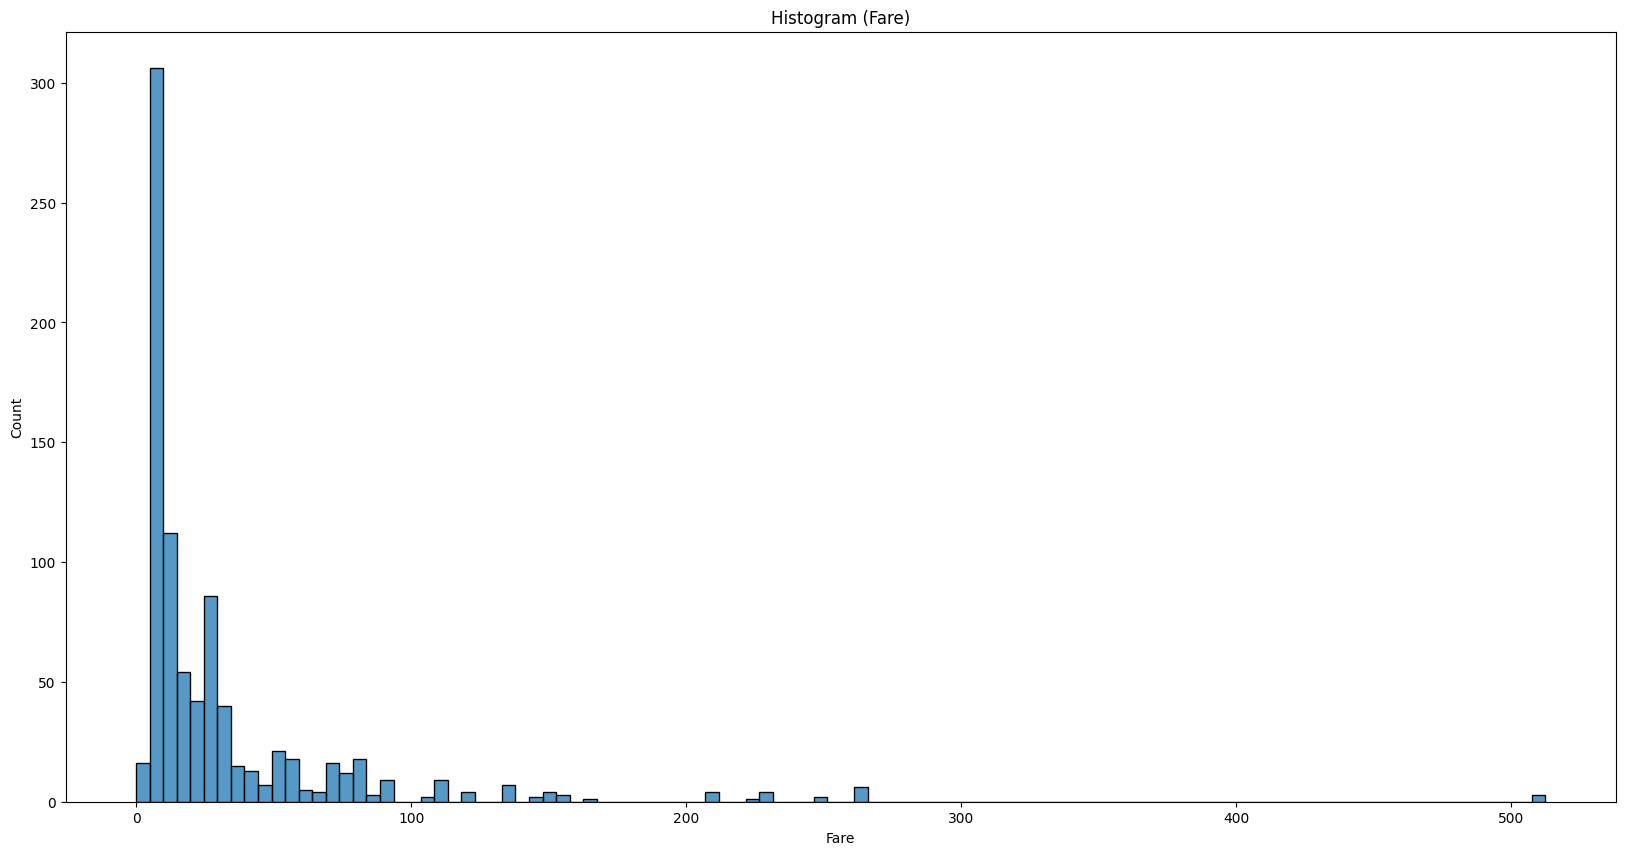

In [ ]:
plt.figure(figsize = (20,10))
sns.histplot(x = "Fare", data = train)
plt.title("Histogram (Fare)")
plt.show()

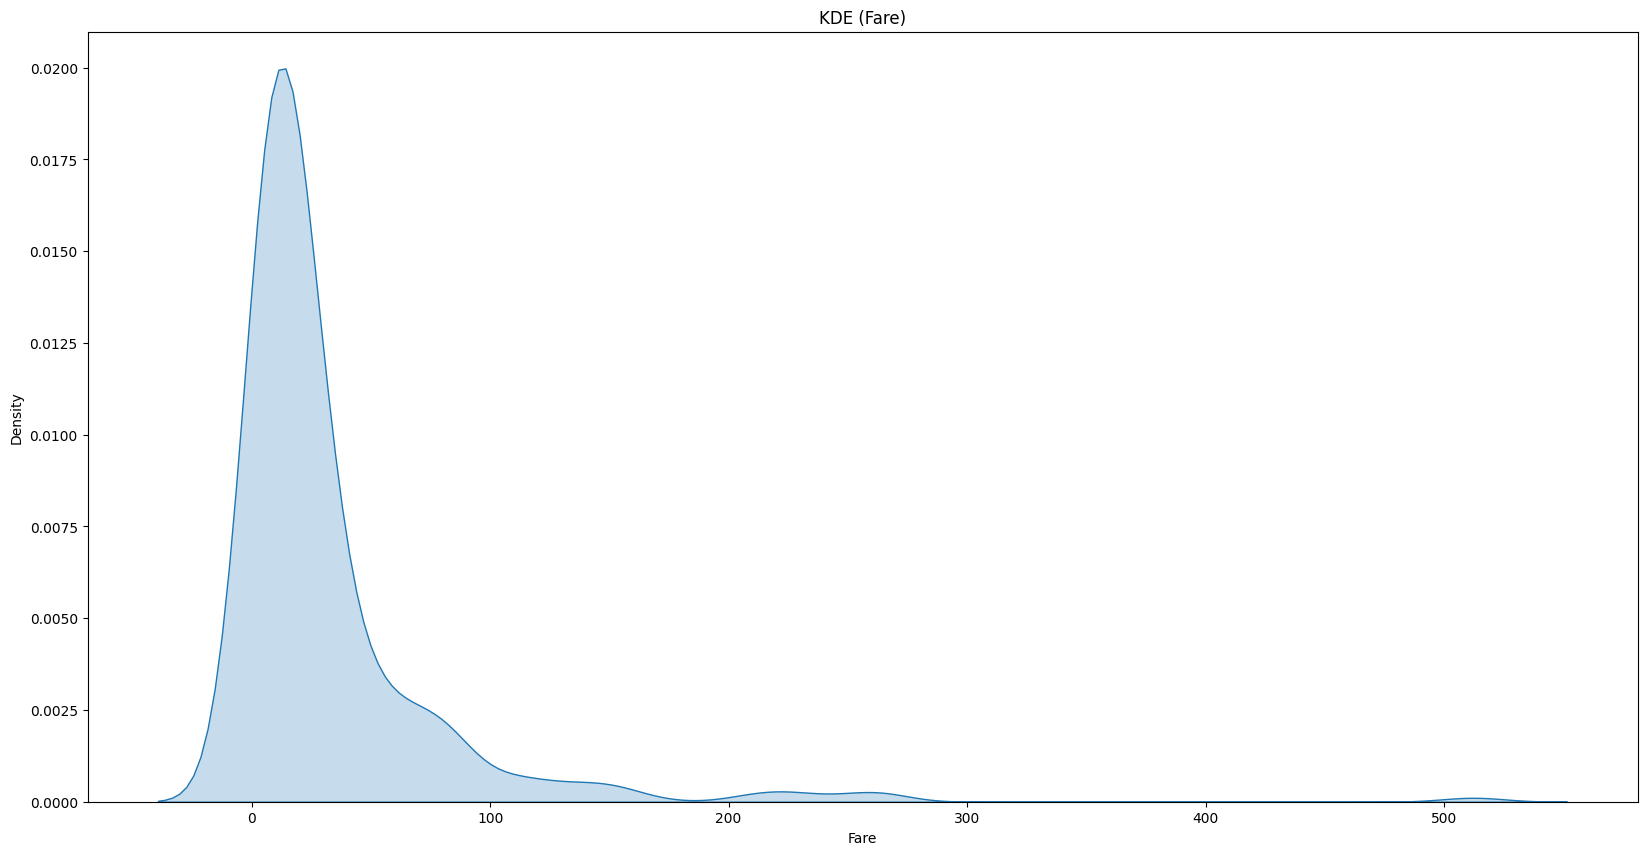

In [ ]:
plt.figure(figsize = (20,10))
sns.kdeplot(x = "Fare", data = train, fill = True)
plt.title("KDE (Fare)")
plt.show()

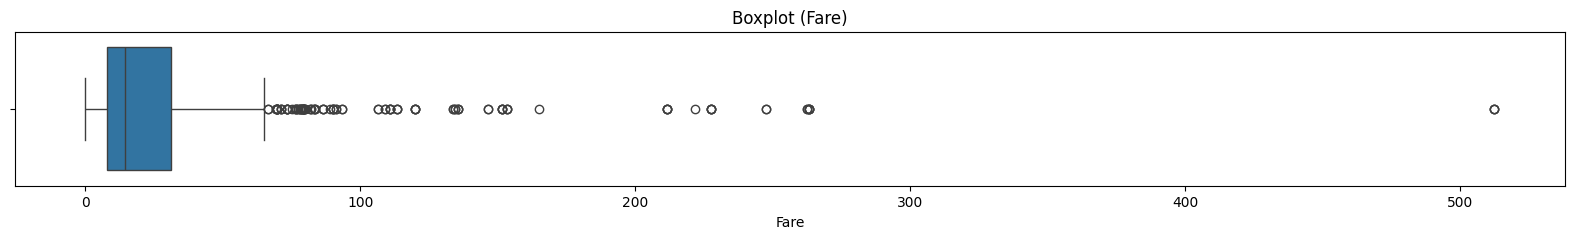

In [ ]:
plt.figure(figsize = (20,2))
sns.boxplot(x = "Fare", data = train)
plt.title("Boxplot (Fare)")
plt.show()

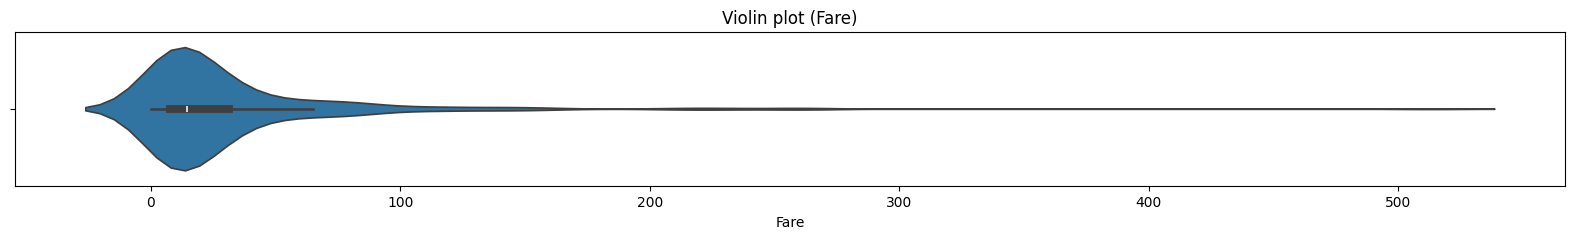

In [ ]:
plt.figure(figsize = (20,2))
sns.violinplot(x = "Fare", data = train)
plt.title("Violin plot (Fare)")
plt.show()

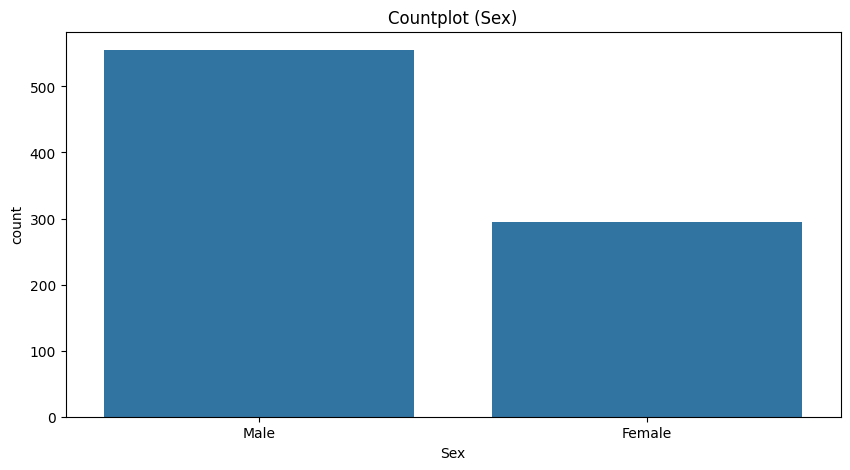

In [ ]:
plt.figure(figsize = (10, 5))
sns.countplot(x = "Sex", data = train)
plt.title("Countplot (Sex)")
plt.xticks([0, 1], ["Male", "Female"])
plt.show()

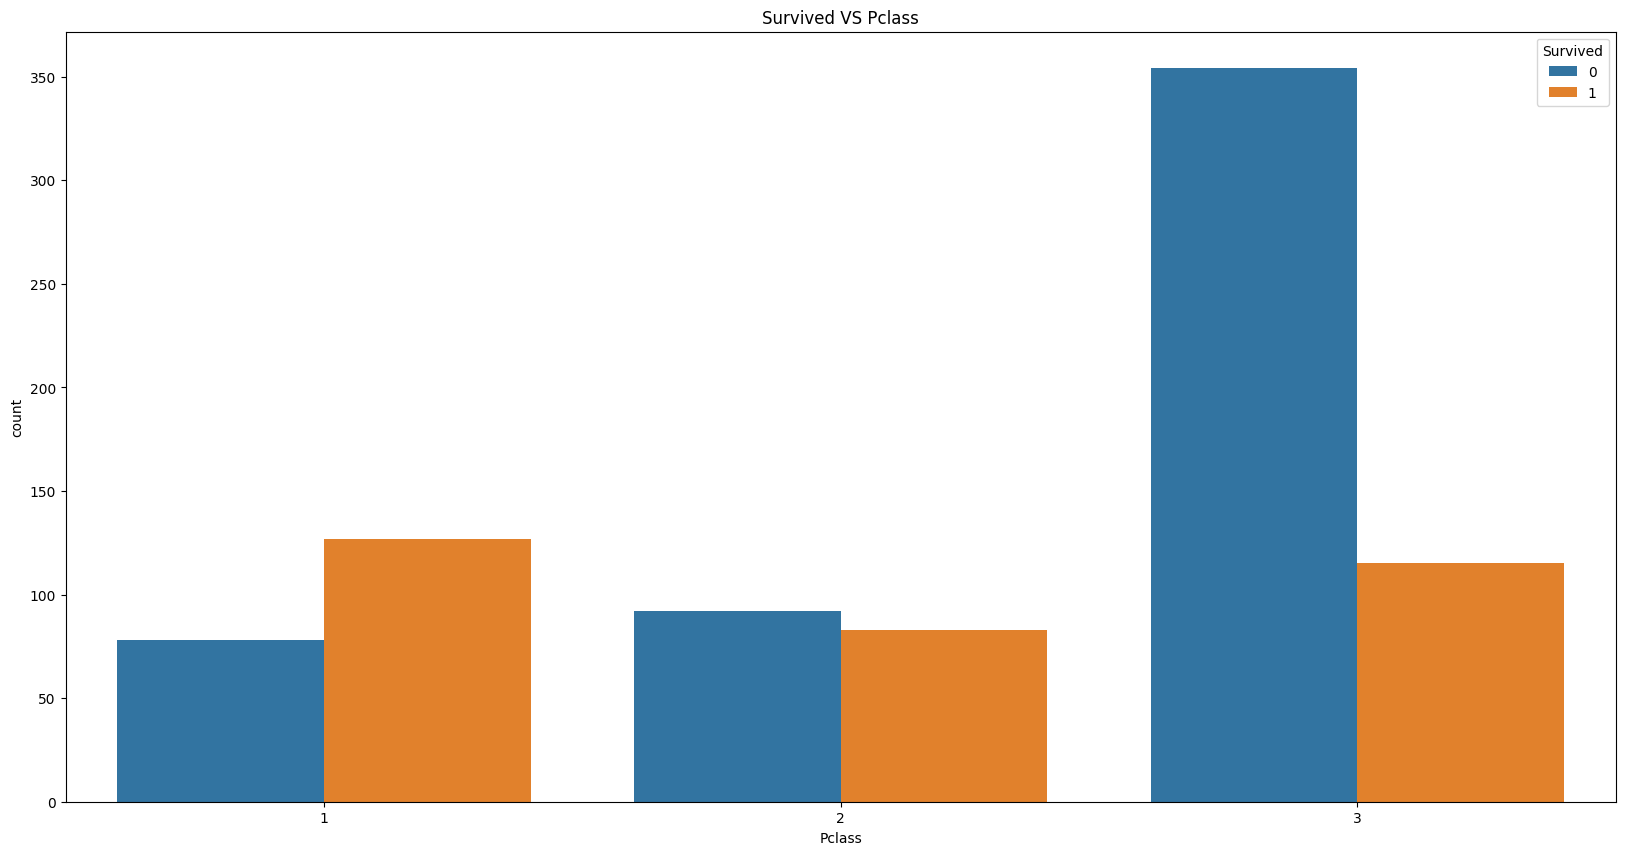

In [ ]:
plt.figure(figsize = (20, 10))
sns.countplot(x = "Pclass", hue = "Survived", data = train)
plt.title("Survived VS Pclass")
plt.show()

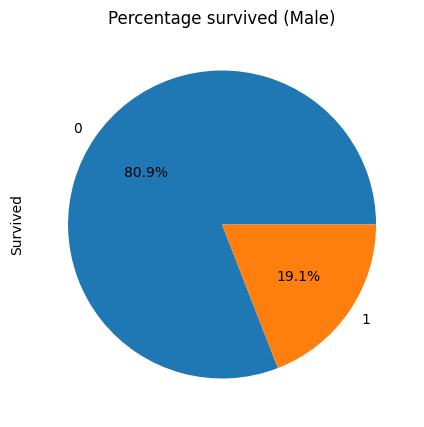

In [ ]:
plt.figure(figsize = (10, 5))
train.loc[train["Sex"] == 0, "Survived"].value_counts().plot.pie(autopct="%1.1f%%")
plt.title("Percentage survived (Male)")
plt.show()

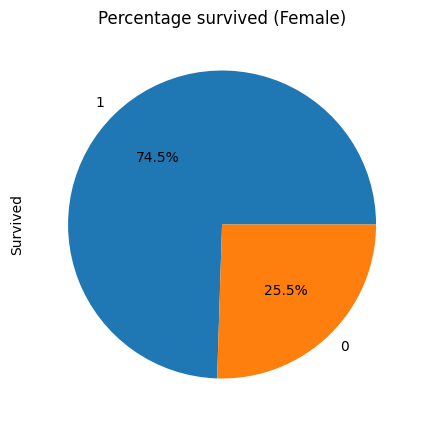

In [ ]:
plt.figure(figsize = (10, 5))
train.loc[train["Sex"] == 1, "Survived"].value_counts().plot.pie(autopct="%1.1f%%")
plt.title("Percentage survived (Female)")
plt.show()

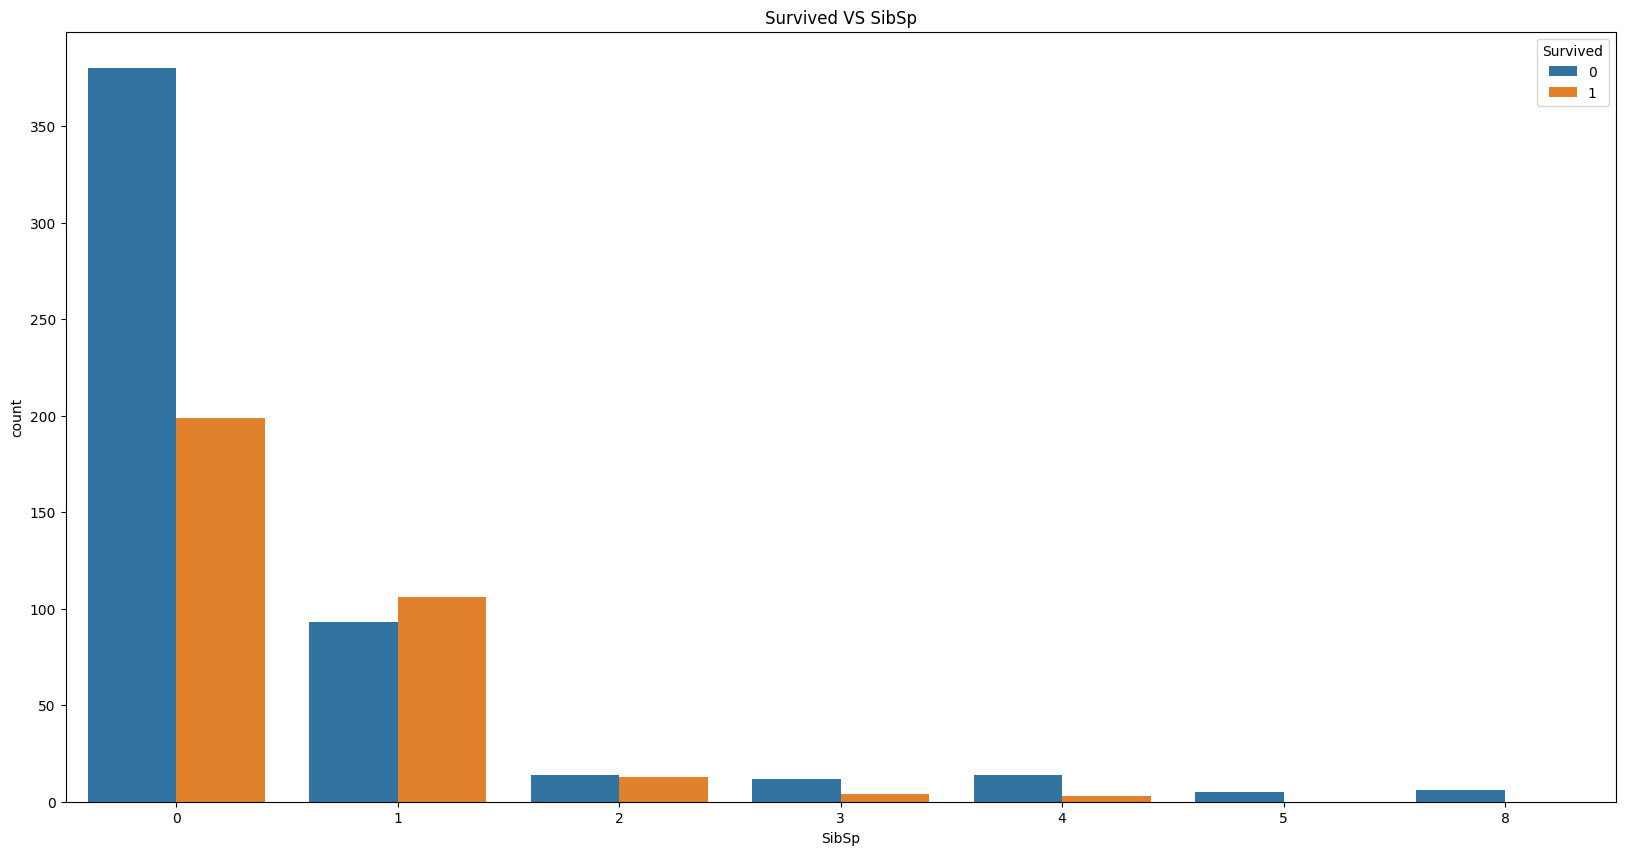

In [ ]:
plt.figure(figsize = (20, 10))
sns.countplot(x = "SibSp", hue = "Survived", data = train)
plt.title("Survived VS SibSp")
plt.show()

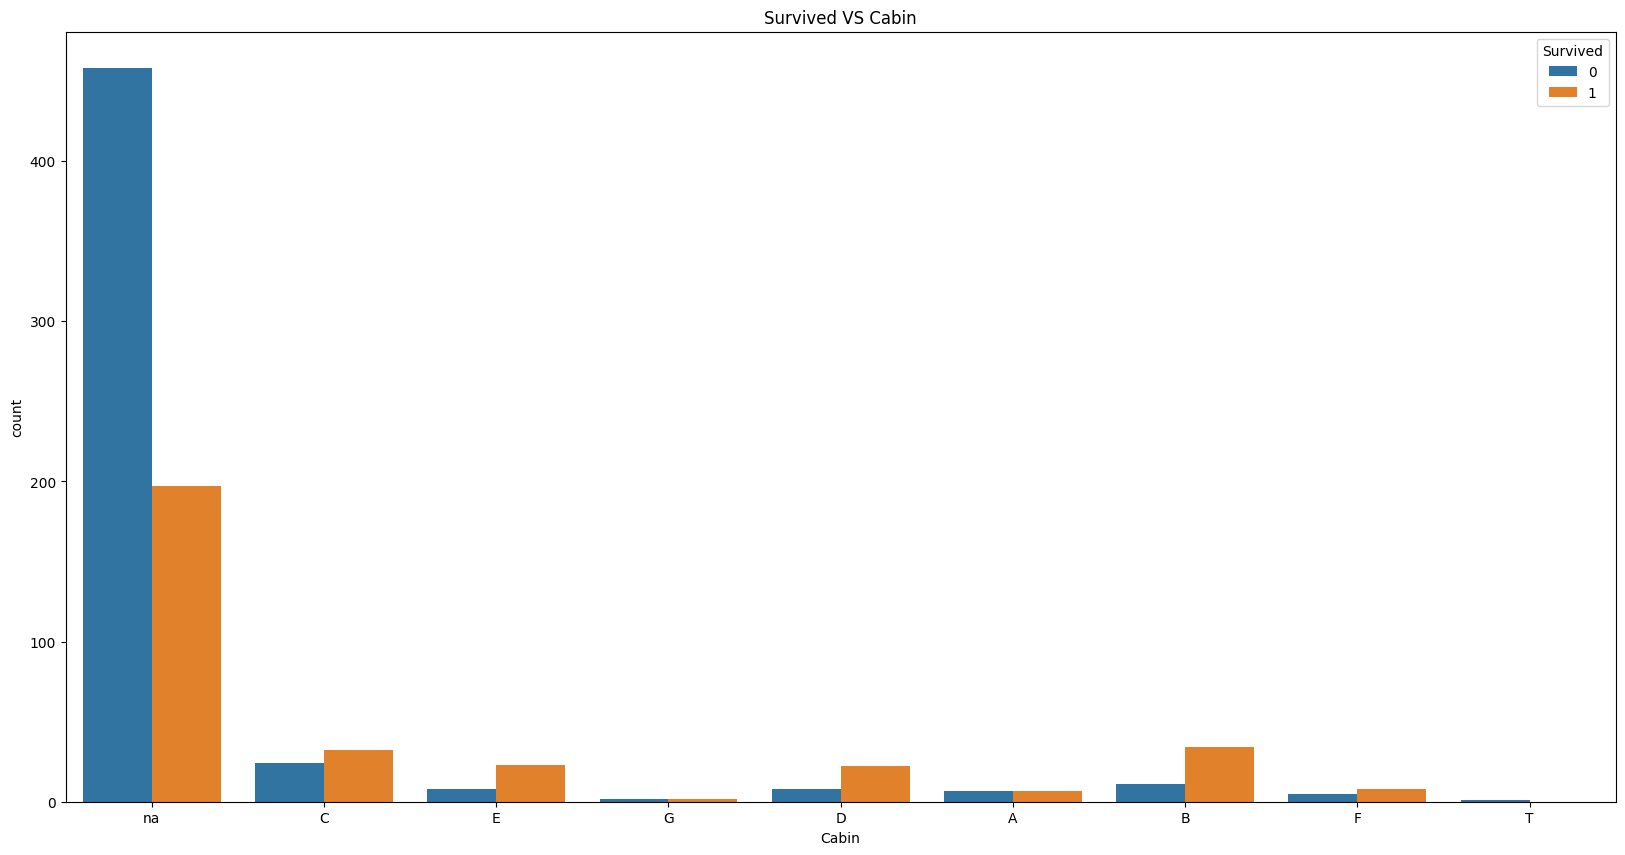

In [ ]:
plt.figure(figsize = (20, 10))
sns.countplot(x = "Cabin", hue = "Survived", data = cabin_plot)
plt.title("Survived VS Cabin")
plt.show()

<ipython-input-103-dda8449c1fc7>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x = "Age", hue = "Survived", data = train, shade = True)


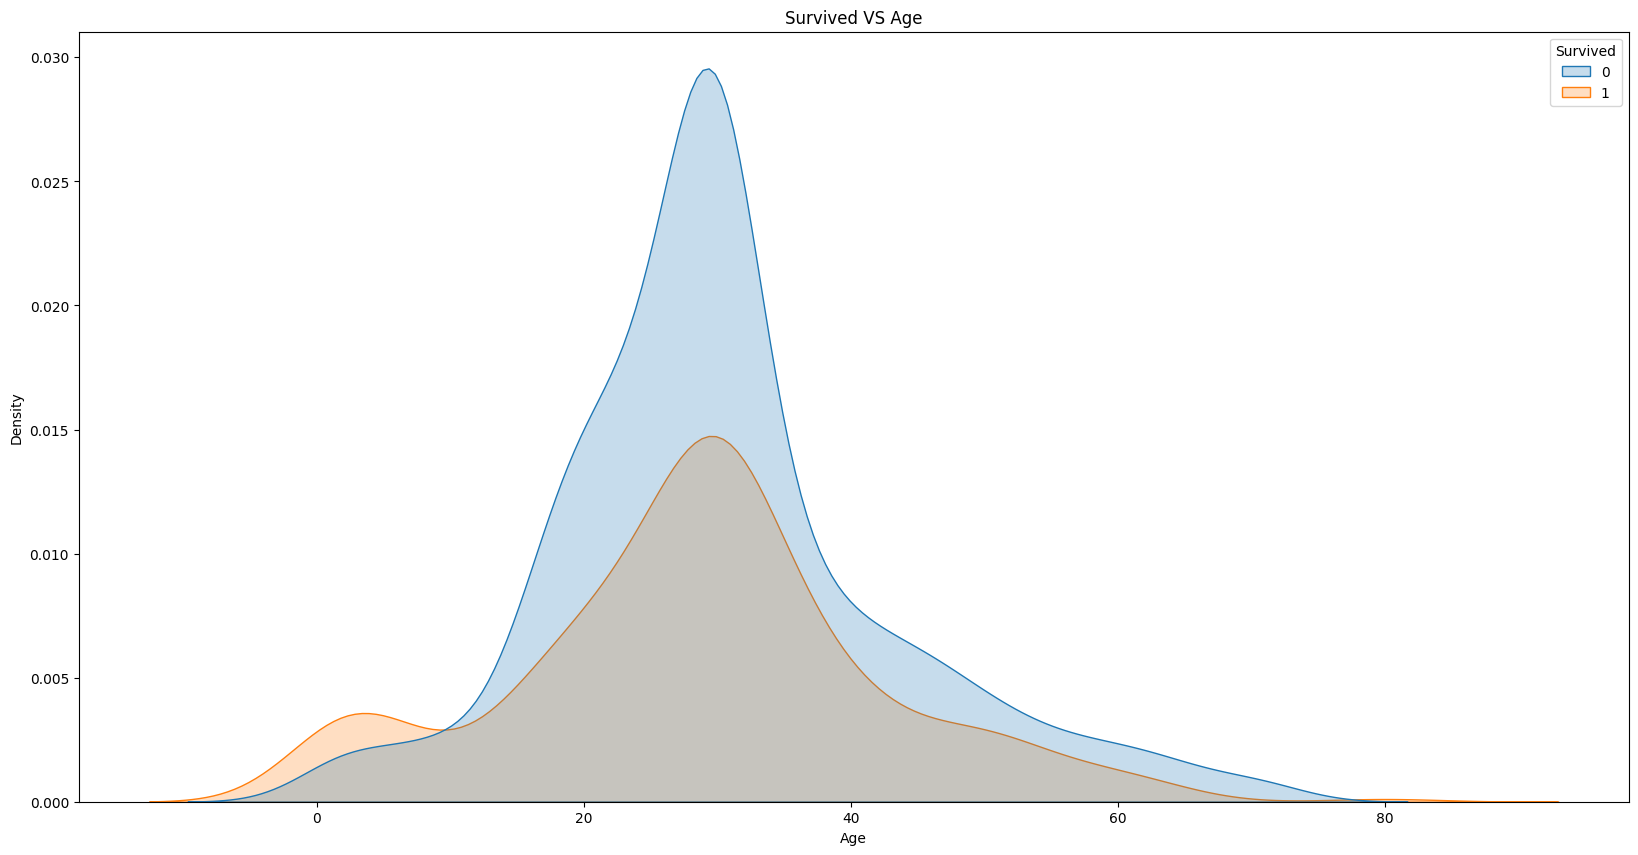

In [ ]:
plt.figure(figsize = (20, 10))
sns.kdeplot(x = "Age", hue = "Survived", data = train, shade = True)
plt.title("Survived VS Age")
plt.show()

<ipython-input-104-0591e83f3d62>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x = "Fare", hue = "Survived", data = train, shade = True)


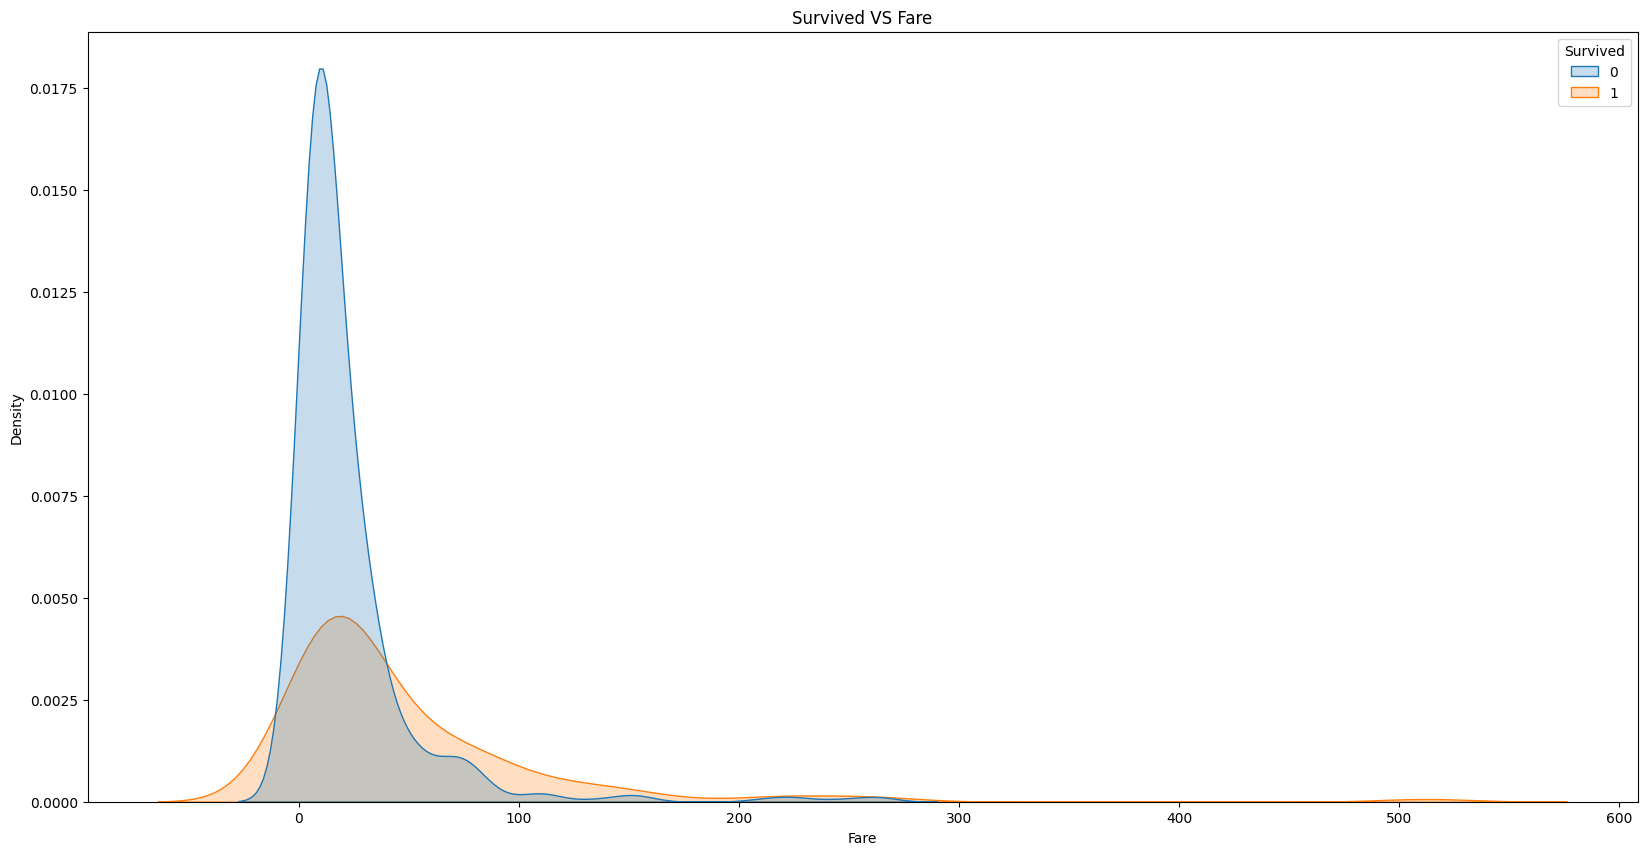

In [ ]:
plt.figure(figsize = (20, 10))
sns.kdeplot(x = "Fare", hue = "Survived", data = train, shade = True)
plt.title("Survived VS Fare")
plt.show()

In [ ]:
y = train["Survived"]
X = train.drop("Survived", axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((679, 8), (170, 8), (679,), (170,))

In [ ]:
decision_tree_model = DecisionTreeClassifier(random_state = 2)
decision_tree_model.fit(X_train, y_train)
y_pred = decision_tree_model.predict(X_test)
decision_tree_model_acc = accuracy_score(y_pred, y_test) * 100
print("Accuracy:", decision_tree_model_acc)

Accuracy: 75.29411764705883


In [ ]:
random_forest_model = RandomForestClassifier(criterion='gini',
                                            n_estimators=1750,
                                            max_depth=7,
                                            min_samples_split=6,
                                            min_samples_leaf=6,
                                            max_features='auto',
                                            verbose=1,
                                            random_state = 3)
random_forest_model.fit(X_train, y_train)
y_pred = random_forest_model.predict(X_test)
random_forest_model_acc = accuracy_score(y_pred, y_test) * 100
print("Accuracy:", random_forest_model_acc)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.2s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    1.9s


Accuracy: 77.05882352941177


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.1s


In [ ]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)
y_pred = NB_model.predict(X_test)
NB_model_acc = accuracy_score(y_pred, y_test) * 100
print("Accuracy:", NB_model_acc)

Accuracy: 72.94117647058823


In [ ]:
knn_model = KNeighborsClassifier(n_neighbors = 5)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
knn_model_acc = accuracy_score(y_pred, y_test) * 100
print("Accuracy:", knn_model_acc)

Accuracy: 68.82352941176471


In [ ]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
svm_model_acc = accuracy_score(y_pred, y_test) * 100
print("Accuracy:", svm_model_acc)

Accuracy: 65.29411764705883


In [ ]:
all_models = pd.DataFrame({
    "Model" : ["Decision tree classifier", "Random forest classifier", "Naive Bayes classifier", "KNN", "SVM"],
    "Accuracy score" : [decision_tree_model_acc, random_forest_model_acc, NB_model_acc, knn_model_acc, svm_model_acc]
})
all_models.sort_values(by = "Accuracy score")

,Model,Accuracy score
4,SVM,65.294118
3,KNN,68.823529
2,Naive Bayes classifier,72.941176
0,Decision tree classifier,75.294118
1,Random forest classifier,77.058824


In [ ]:
random_forest_model = RandomForestClassifier(criterion='gini',
                                            n_estimators=1750,
                                            max_depth=7,
                                            min_samples_split=6,
                                            min_samples_leaf=6,
                                            max_features='auto',
                                            verbose=1,
                                            random_state = 3)
random_forest_model.fit(X, y)
y_pred = random_forest_model.predict(test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.3s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    2.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.2s


In [ ]:
submission = pd.DataFrame({
    "PassengerId" : test_passenger_ids,
    "Survived" : y_pred
})
submission.tail(10)


,PassengerId,Survived
389,1281,0
390,1282,0
391,1283,1
392,1284,0
393,1285,0
394,1286,0
395,1287,1
396,1288,0
397,1289,1
398,1290,0


In [ ]:
submission.to_csv('submission.csv', index = True)

In [ ]:
submission.to_csv('submission.csv', index = False)